<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_data_cleaning_III_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [ ]:
#first address the missing values

education_df.interpolate()
#drop anything that is still missing:

education_df.dropna(inplace=True)
education_df.head()
education_df.shape

(413, 25)

Question 1: Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

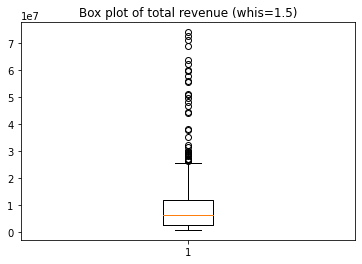

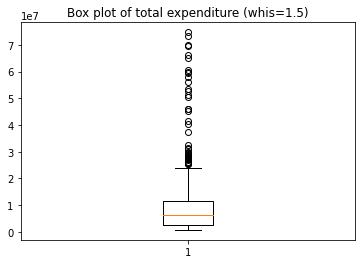

Yes, both variables have outliers.


In [ ]:
plt.boxplot(education_df["TOTAL_REVENUE"])
plt.title("Box plot of total revenue (whis=1.5)")
plt.show()

plt.boxplot(education_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of total expenditure (whis=1.5)")
plt.show()
print('Yes, both variables have outliers.')

Question 2: If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

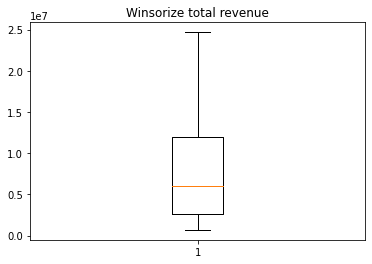

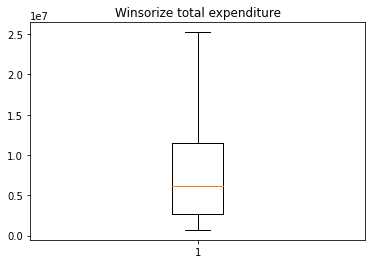

Yes, it looks like the outliers have been handled.


In [ ]:
#I do not have to actually drop them, I can limit their values

winsorize_REVENUE = winsorize(education_df["TOTAL_REVENUE"], (0, 0.10))
winsorize_EXPENDITURE = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.10))

#check to make sure the outliers have been addressed:
#Just do one-way winsorize because of where the outliers are


plt.boxplot(winsorize_REVENUE, whis = 2)
plt.title("Winsorize total revenue")
plt.show()


plt.boxplot(winsorize_EXPENDITURE, whis = 2)
plt.title("Winsorize total expenditure")
plt.show()
print('Yes, it looks like the outliers have been handled.')

Question 3: Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

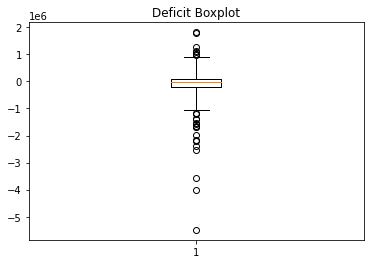

Yes, there are outliers.


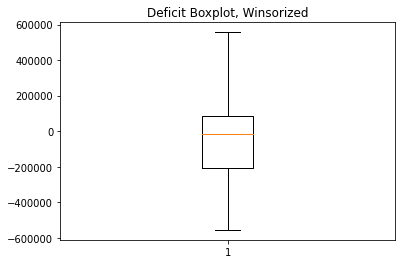

In [ ]:
#Create the variable:
deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

#plot to check for outliers:

plt.boxplot(deficit, whis = 3)
plt.title("Deficit Boxplot")
plt.show()
print('Yes, there are outliers.')

#address the outliers:
#two way winsorize because there are outliers on both sides:

winsorize_deficit = winsorize(deficit, (0.10, 0.05))
plt.boxplot(winsorize_deficit, whis = 2)
plt.title("Deficit Boxplot, Winsorized")
plt.show()
#I had to adjust the winsorize levels to fully handle the outliers

Question 4: Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

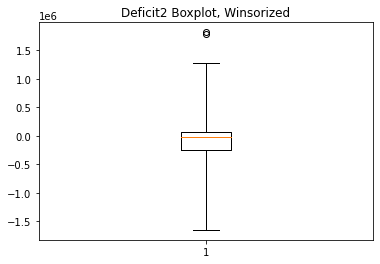

Yes, there are just a few outliers.


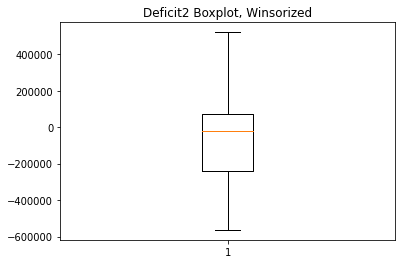

The outliers have been addressed.


In [ ]:
#first create the variable:
deficit2 = winsorize_REVENUE - winsorize_EXPENDITURE

#plot to check for outliers:

plt.boxplot(deficit2, whis = 5)
plt.title("Deficit2 Boxplot, Winsorized")
plt.show()
print('Yes, there are just a few outliers.')

#winsorize again:

winsorize_deficit2 = winsorize(deficit2, (0.05, 0.05))
plt.boxplot(winsorize_deficit2, whis = 5)
plt.title("Deficit2 Boxplot, Winsorized")
plt.show()
print('The outliers have been addressed.')

Question 5: Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [ ]:
#variables: winsorize_deficit and winsorize_deficit2 
from scipy import stats
print(stats.describe(winsorize_deficit))
print(stats.describe(winsorize_deficit2))

print('The variables do differ. For example, the mean is -75586.53 for winsorize_deficit2 but is -44725.81 for winsorize_deficit')

DescribeResult(nobs=413, minmax=(-556255.0, 557170.0), mean=-44725.80629539952, variance=81131778305.63716, skewness=0.05635488240547835, kurtosis=-0.06886404033977245)
DescribeResult(nobs=413, minmax=(-563852.0, 520719.0), mean=-75586.53268765133, variance=83677070269.83693, skewness=-0.08924477969405623, kurtosis=-0.3100175450912337)
The variables do differ. For example, the mean is -75586.53 for winsorize_deficit2 but is -44725.81 for winsorize_deficit


Question 6: If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I think the variable from question 3 is more appropriate because it was only winsorized once (from the original variable). The variable from question 4 was winsorized twice.